<a href="https://colab.research.google.com/github/jacekwachowiak/UCA-image-processing/blob/master/Tp_Data_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Enhancement 
                                    TP Introduction
                                    abechens@unice.fr
                                    19/09-2019

Un compte rendu en binome est a rendre par mail au plus tard 25/09.

## Introduction: 
On peut definir une image comme une fonction 2D (image monochrome) de l'intensite lumineuse, $u(x,y)$, en fonction de la localisation spatial ($x$ et $y$ sont les coordonnnees spatiales).

Une image numeriqe est une image dont le domaine spatial et la luminosite ont ete discretises. ON peut la representer par une matrice 2D. Chaque element de la matrice est un pixel, represente par ses coordonnees $(i,j)$ et sa valeur $v=p(i,j)$ communement appelee niveau de gris. Les images sont le plus souvent codees en 256 niveaux de gris (codage sur 8 bits). C'est ce qu'on appelle la dynamique de l'image. 


In [0]:
# Fonctions et imports utiles
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from scipy.ndimage.filters import median_filter

La fonction imread de pyplot permet de charger le contenu d'une image et reconnait la plupart des formats de fichiers utilises en traitement d'images.


1. Importer et afficher l'image de Lena avec pyplot. Voir l'impact de vmin et vmax.

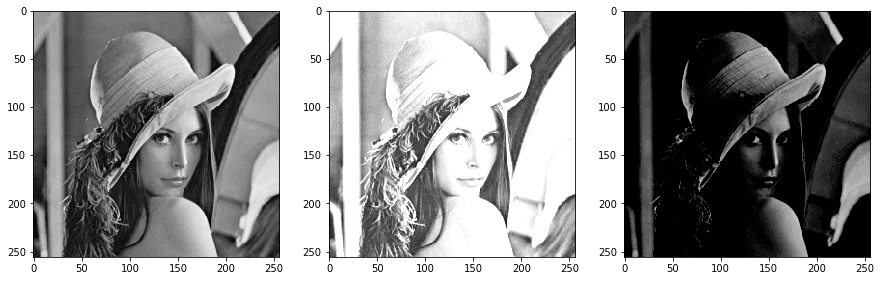

In [0]:
# Load the image
lena = plt.imread("lena.bmp")

# Plot images with different values of vmin and vmax
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,3,1)
plt.imshow(lena, cmap='gray')
fig.add_subplot(1,3,2)
plt.imshow(lena, cmap='gray', vmin=0, vmax=128)
fig.add_subplot(1,3,3)
plt.imshow(lena, cmap='gray', vmin=128, vmax=255)

Max value is 241 and Min is 17


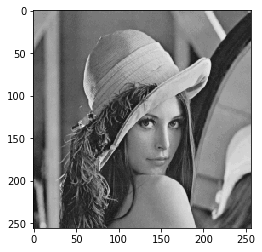

In [0]:
vmax = np.max(lena)
vmin = np.min(lena)
print ("Max value is {0} and Min is {1}".format(vmax, vmin))
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)

## Comments
We see that the hair is less dark that on the image above, this is because imshow applies some enhancement to the image by default, so when we explicitly specify the minimum value for black as 0 and the maximum value for white as 1 the image shows without any enhancement. If we set for example `vmin=128, vmax=255` all the pixels below 128 will be considered black. If we set `vmin=0, vmax=128` all the pixels above 128 will be considered white.

## Histogram
L'historgramme d'une image permet de representer la densite de probabilite des pixels au sein de cette image. 

Soit $h_u(v)$ la fonction egale au nombre de pixels d'intensite v au sein de l'image u, alors on peut definir la densite de probabilite $P_u(v)$ par: 
$$
P_u(v)=\frac{h_u(v)}{n_cn_l}
$$

En modifiant cette densite de probabilite, on joue sur les caracteristiques de l'image. On peut, par exemple, reakuser des operations de type rehaussement de contraste via des transformations d'historgrammes. 

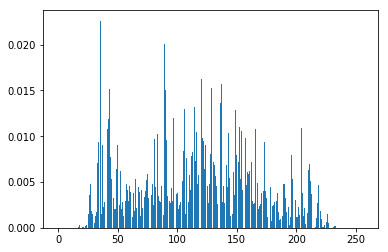

In [0]:
def histogram(u):
    u=u.astype(int)
    histog=np.zeros(256)
    for i in range(256):
        histog[i]=sum(sum(u==i))
    histog=histog/len(u)**2
    return histog

# Show Lena's Histogram
plt.bar(range(256),histogram(lena))
plt.show()

## Transformations simples
Un algorihtme de transformation d'histogramme a l'allure suivante:
- Pour chaque pixel $p$ de l'image, lire son intensite $v$.
- Remplacer $v$ par $T(v)$.
    
La fonction $T$ est appelee transformation d'histogramme.
1. Transformez l'histogramme de l'image Lena en utilisant les fontions T suivant:
$$
T(v)= \begin{cases}
255 \text{ si } v>128\\
0 \text{ sinon }
\end{cases}
$$

$$
T(v)=255-v
$$



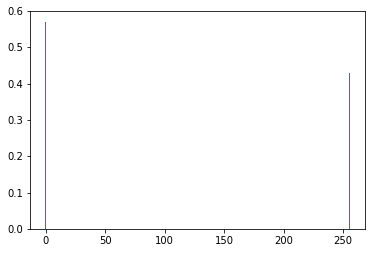

In [0]:
# Transformation 1 + Histogram
# Pure black and white threshold converter
def toBlackAndWhite( image, threshold ) :
    t_image = np.zeros(image.shape)
    t_image[image > threshold]=255
    return t_image

# Applying the transformation
threshold = 128
t1_image = toBlackAndWhite(lena, threshold)

# Plotting the histogram
h1 = histogram(t1_image)
plt.bar(range(256),h1)
plt.show()

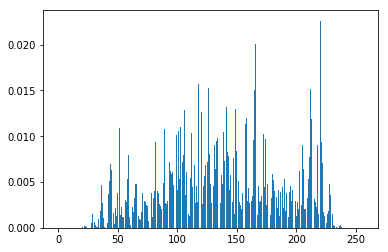

In [0]:
#Transformation 2 + Histogramme
# Inverter
def transformationT2(image) :
    t_image = np.full(image.shape, 255) - image
    return t_image

# Applying the transformation
t2_image = transformationT2(lena) 

# Plotting the histogram
h2 = histogram(t2_image)
plt.bar(range(256),h2)
plt.show()

2. Observez les images transformees et essayez de nommer chaque transformation

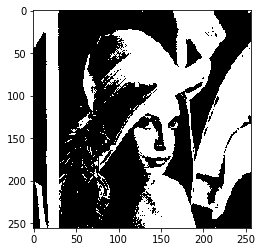

In [0]:
# The first transformation is a pure black and white threshold converter
plt.imshow(t1_image, cmap='gray')

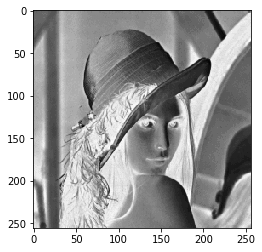

In [0]:
# The second transformation is an inverter, is like multiplying the image by a line with slope -1 
# that turns bright spots into dark ones and viceversa. It is like a film negative.
plt.imshow(t2_image, cmap='gray')

The histogram comparison confirms that the bars are flipped horizontally and that there are only 2 pixel values the monochrome - pure black and white transformation.

## Amelioration de la dynamique
1. Affichez limage Clown


Max value is 179 and Min is 73


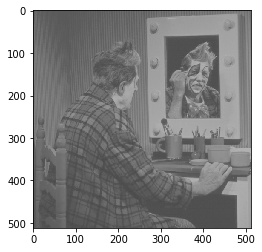

In [0]:
#Code here to  CLOWN_LUMI2.BMP
clown = plt.imread("CLOWN_LUMI2.bmp")
plt.imshow(clown, cmap='gray', vmin=0,vmax=255)
print ("Max value is {0} and Min is {1}".format(np.max(clown), np.min(clown)))

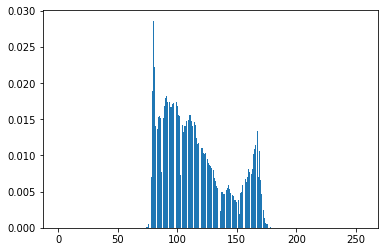

In [0]:
#Visualizing the histogram
plt.bar(range(256),histogram(clown))
plt.show()

On visualise clairement que la dynamique de l'image Clown  m'est pas tres importante. Or, plus la dynamique est etalee et meilleure est la qualite de l'image.

1. En definissant $a$ et $b$ comme les limites respectivement inferieure et superieure de l'histogramme de l'image d'entree, ecrivez la fontion $T$ permettant d'utiliser toute la dynamique (de 0 a 255) de l'image.

In [0]:
# To apply a function to each element of an np array I vectorize the function which makes it superfast
def T(x, a, b):
    return int(round( 255* (x-a)/(b-a) ))
    
f = np.vectorize(T)

def maxmin_normalize(image):
    a = np.min(image)
    b = np.max(image)
    return np.array([f(elem, a, b) for elem in image])


2.Appliquez cette transformation sur l'image clown et commentez le resultat. Affichez les histogrammes correspondants. 

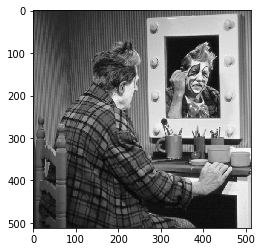

In [0]:
t3_image = maxmin_normalize(clown) 
plt.imshow(t3_image, cmap='gray', vmin=0, vmax=255)

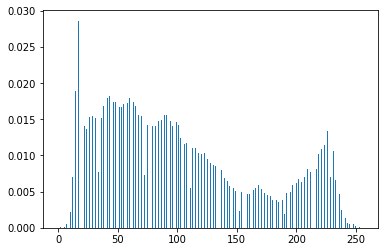

In [0]:
h3 = histogram(t3_image)
plt.bar(range(256),h3)
plt.show()

## Commentez ici
As we can see from the histogram we stretched the values of the image to cover the complete range of the grayscale so we have real white values and real black values, and by making the dynamic range wider we substantially improved the image quality.

### Histogramme cumule

L'histogramme cumule est un histogramme qui prend en compte tous les pixels dont la valeur est inferieure ou egale au niveau de gris courant. On normalise ce nombre en divisant par le nombre total de pixels.

Son application la plus connue est l'egalisation d'histogramme qui consiste a faire tendre la densite de probabilite des pixels, $P_u(v)$, vers une loi uniforme (on "etale" l'histogramme). Ceci est obtenu via la transformation suivante : 
$$
T(v) = 255H_c(v)
$$
ou $H_c$ est l'histogramme cumule. 

1. Plot l'histogramme cumule de Clown.


In [0]:
#Plot Histogramme cumule
def cumhistogram(histogram) :
    cumulative = np.cumsum(histogram)
    return cumulative/np.max(cumulative)

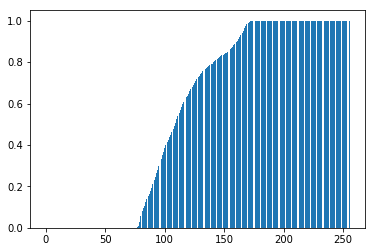

In [0]:
plt.bar(range(256),cumhistogram(histogram(clown)))
plt.show()

2. Appliquez cette transformation sur l'image precedente et commentez.

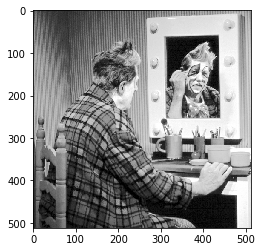

In [0]:
def transformationHC(image) :
    cum_hist = cumhistogram(histogram(image))
    return np.array([255*cum_hist[val] for val in image])

t4_image = transformationHC(clown)
plt.imshow(t4_image, cmap='gray', vmin=0, vmax=255)

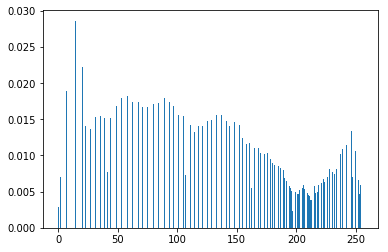

In [0]:
plt.bar(range(256),histogram(t4_image))
plt.show()

3. Verifier l'histogramme cumule de l'image de sortie pour visualiser l'operation d'egalisation.

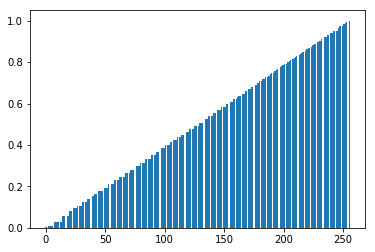

In [0]:
plt.bar(range(256),cumhistogram(histogram(t4_image)))
plt.show()

# Filtrage
## Definitions
Le filtrage est une operation souvent utilisee en traitement d'images permettant par exemple de reduire le bruit contenu dans l'image. Ce filtrage peut etre lineaire ou non-lineaire. 

Dans le cas d'un filtre lineaire, l'operation de filtrage peut etre realisee au moyen d'un produit de convolution. Soit $h$ le filtre ou masque de convolution, l'operation de convolution $$
w=u*h
$$
est definie en discret par :
$$
w(i,j)=\sum_{n=1}^{n_l}\sum_{m=1}^{n_c} u(n,m)h(i-n,j-m)
$$
on  considere ici que $h$ est periodisee en dehors de $\{1,..., n_l\} \times \{1,...,n_c\}$.

La fonction scipy.ndimage.correlate(u,h,mode) permet de réaliser l'opération de filtrage de l'image $u$ par le masque de convolution $h$. 

Le filtrage non linéaire le plus utilisé est le filtre médian. Ce filtre remplace la valeur d'un pixel par la médiane des valuers de ses voisins. Ce filtrage consiste à: 
- Chercher et à ordonner les valeurs des voisins du pixel courant v (suivant un masque d'une taille de $K \times K$).
- Selectionner la valeur située sur la médiane et remplacer $v$ par cette valeur. 

## Applications
1. Définissez les deux masques de convolution suivants : 
$$
h_1=\frac{1}{9} \left[\begin{matrix}
1 & 1 & 1 \\
1 & 1 & 1\\
1 & 1 & 1
\end{matrix}\right] \quad h_2= \left[\begin{matrix}
0 & 1 & 0 \\
1 & -4 & 1\\
0 & 1 & 0
\end{matrix}\right]
$$

2. Commentez l'image filtrée par ces masques de convolutions. L'image de départ peut être l'image de Lena.

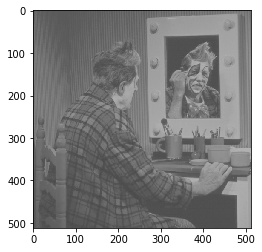

In [0]:
# Before
plt.imshow(clown, cmap='gray', vmin=0, vmax=255)

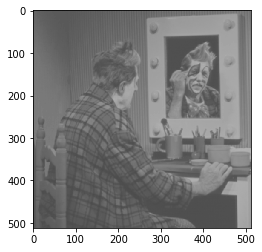

In [0]:
# After h1 
def mean_filter(image, size):
    h1=np.ones((size,size))/(size*size)
    return scipy.ndimage.correlate(image,h1)
   
plt.imshow(mean_filter(clown, 3), cmap='gray', vmin=0, vmax=255)

As we can appreciate from the image, the moiré-like pattern on the left wall completely disappeared with the application of the mean filter (filtre moyenne) but the image appears blurred and some detail is lost.

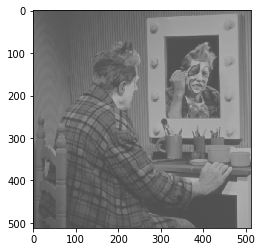

In [0]:
plt.imshow(median_filter(clown, 3), cmap='gray', vmin=0, vmax=255)

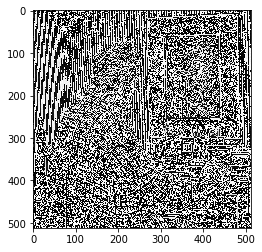

In [0]:
# After h2
def laplacian_filter(image):
    h2=np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])
    return scipy.ndimage.correlate(image,h2)

plt.imshow(laplacian_filter(clown), cmap='gray', vmin=0, vmax=255)

In [0]:
h1=np.ones((3,3))/(3*3)
h2=np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

This filters highlights the moiré-like pattern on the original image that was removed by h1, as the laplacian filter detects the edges.

In [0]:
# We can verify it is the laplacian filtering by ensuring the library filter gives the same result
hand_made = laplacian_filter(clown)
library = scipy.ndimage.filters.laplace(clown)
print(np.array_equal(hand_made,library))

True


Une des applications où le filtrage est très utilisé est  l'atténuation de bruit. Le bruit est une altération de l'image : Toute l'information pertinente dans l'image n'est pas simplement accessible. Le filtrage consiste donc à retrouver le maximum d'information dans l'image bruitée. Certains filtres sont a pr´coniser selon le type de bruit. 
4. Chargez l'image Lena et bruitez-la en rajoutant une bruit additif et aléatiore suivant une distribution gaussienne de moyenne nulle et d'écart-type 20. ( Utilsez le fonction np.random.normal)

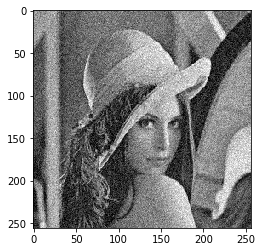

In [0]:
#Load image
lena = plt.imread("lena.bmp")

#Add noise and plot
lena_gnoisy = lena + np.random.normal(0,20,lena.shape)
plt.imshow(lena_gnoisy, cmap='gray',vmin=0, vmax=255)

5. Observez l'image en sortie du filtre moyenneur et du filtre median puis commentez.

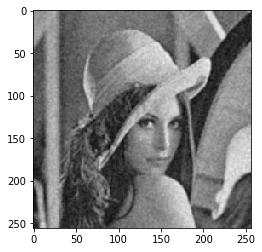

In [0]:
# Mean Filter
lena_meanf = mean_filter(lena_gnoisy,3)
plt.imshow(lena_meanf, cmap='gray', vmin=0, vmax=255)

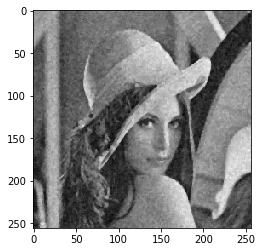

In [0]:
lena_medf = median_filter(lena_gnoisy,3)
plt.imshow(lena_medf, cmap='gray', vmin=0, vmax=255)

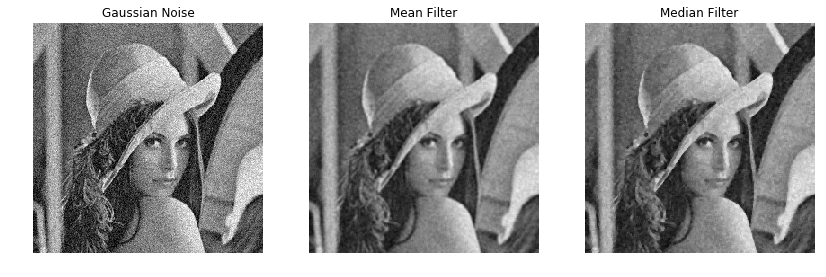

In [0]:
# Recap 
def plot_images(images, nrows = 1, ncols=1):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14,14))
    for ind, im_filter in enumerate(images):
        axeslist.ravel()[ind].imshow(images[im_filter], cmap="gray", vmin=0, vmax=255)
        axeslist.ravel()[ind].set_title(im_filter)
        axeslist.ravel()[ind].set_axis_off()
        
lena_images = {"Gaussian Noise": lena_gnoisy, "Mean Filter": lena_meanf, "Median Filter": lena_medf }
plot_images(lena_images, nrows =1, ncols=3)

As we can observe from the images median filter does a great job at reducing noise while retaining the edges while the mean filters just slightly blurs the entire image.

6. Procédez de la même facon en bruitant l'image avec du bruit "poivre et sel" (probabilité 10%) à l'aide la fonction salt_and_pepper)

In [0]:
def salt_and_pepper(image,amount):
    row,col= image.shape
    s_vs_p = 0.5
    out = np.copy(image)
    
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords1 = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[tuple(coords1)] = 255

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords2 = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[tuple(coords2)] = 0

    return out

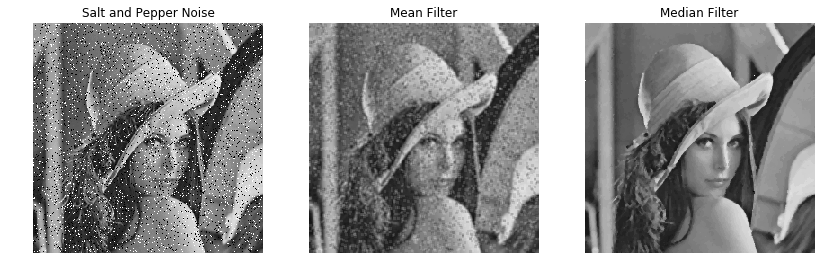

In [0]:
lena_spnoisy  = salt_and_pepper(lena,0.1)
lena_sp_meanf = mean_filter(lena_spnoisy,3)
lena_sp_medf  = median_filter(lena_spnoisy,3)

lena_sp_images = {"Salt and Pepper Noise": lena_spnoisy, "Mean Filter": lena_sp_meanf, "Median Filter": lena_sp_medf }
plot_images(lena_sp_images, nrows =1, ncols=3)

7. Commentez

We can appreciate from the images above that the median filter is a very effective way to reduce salt and pepper, while mean filter does a poor job

# Transformée de Fourier
## Définitions
La transformée de Fourier permet de représenter une information temporelle (spatiale en 2D) en une information fréquentielle. La transformation de Fourier 2D discrète s'écrit : 
$$
\hat{u} (v,w) = \frac{1}{n_l n_c} \sum_{n=0}^{n_l-1}\sum_{m=0}^{n_c-1} u(n,m)\exp^{-j2\pi\left(\frac{vn}{n_c}+\frac{wm}{n_l}\right)}
$$
On représente habituellement le logarithme (pour accentuer le contraste) du module de la tranformée de Fourier "recentrée" à l'aide de la fonction np.fft.fftshift.

Calculez la tranformée de Fourier (np.fft.fft2) de l'image Lena et affichez son module.

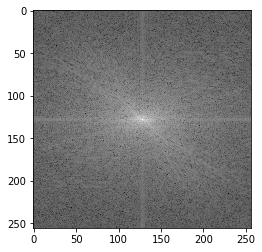

In [0]:
lena_fft = np.fft.fft2(lena)

# center 
dft_shift = np.fft.fftshift(lena_fft)

# image in the fourier domain.
magnitude_spectrum = np.log(np.abs(dft_shift)+1)

plt.imshow(abs(magnitude_spectrum), cmap = 'gray')

#### 4.2 Filtrage fréquentiel
Nous allons réaliser comme précédemment une opération de filtrage mais dans le domaine fréquentiel cette fois-ci. Ceci s'effectie en 3 étapes. 
1. Calcul des transfomees de Fourier de l'image $u$ et du filtre $h$.
2. Multiplication terme à terme dans le domaine fréquentiel. 
3. Transformée inverse.

Créez un masque carré $h$, ne contenant que des 1, de taille $5 \times 5$. Normalisez ce filtre et calculez et affichez sa transformée de Fourier.

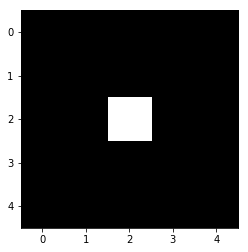

In [0]:
h = np.ones((5,5))/25

# Define a function that will come in handy
def getMagnitudeSpectrum(h):
    h_fft = np.fft.fft2(h)
    h_fftshift = np.fft.fftshift(h_fft)
    return np.log(np.abs(h_fftshift)+1)

plt.imshow(getMagnitudeSpectrum(h), cmap = 'gray')

Quel est ce type de filtre ?

it's a 5 x 5 mean filter

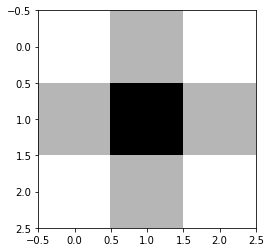

In [0]:
# If we do the same for the laplacian filter we observe a pattern
laplace=np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])
plt.imshow(getMagnitudeSpectrum(laplace), cmap = 'gray')

Réalisez le filtrage comme décrit ci-dessus. 

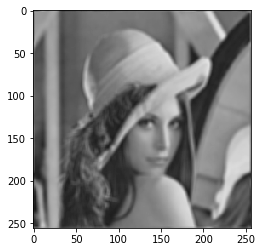

In [0]:
img = lena
# Pad and center the kernel
padding = (img.shape[0] -  h.shape[0], img.shape[1] - h.shape[1])
padded = np.pad(h, (((padding[0]+1)//2, padding[0]//2), ((padding[1]+1)//2, padding[1]//2)), 'constant')
kernel = np.fft.ifftshift(padded)

ffiltered = np.abs(np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(kernel)))
plt.imshow(ffiltered, cmap='gray', vmin=0, vmax=255)
plt.show()

Vérifiez le résultat obtenu et commentez.

Mean pass filter 5 x 5. This is thanks to the convolution theorem that states that under suitable conditions the pointwise product of the Fourier transforms of it the Fourier transform of its convolution.

$$ f*g= \mathcal{F}^{-1}\big\{\mathcal{F}\{f\}\cdot\mathcal{F}\{g\}\big\}$$